# Task 7: Support Vector Machines (SVM)
This notebook demonstrates training and evaluating Support Vector Machines using both Linear and RBF kernels on the Breast Cancer dataset, with decision boundary visualization and hyperparameter tuning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [2]:
# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# GridSearch for best RBF
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True)
grid.fit(X_train, y_train)
best_rbf_model = grid.best_estimator_
y_pred_best_rbf = best_rbf_model.predict(X_test)

# Metrics
print("Linear Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Best RBF Accuracy:", accuracy_score(y_test, y_pred_best_rbf))
print("Best Params:", grid.best_params_)

Linear Accuracy: 0.9912280701754386
RBF Accuracy: 0.9649122807017544
Best RBF Accuracy: 0.9736842105263158
Best Params: {'C': 10, 'gamma': 0.01}


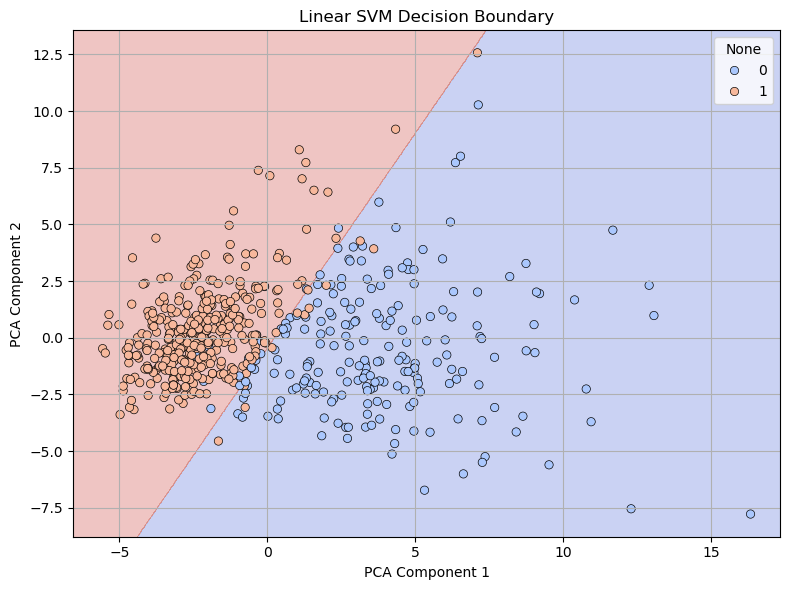

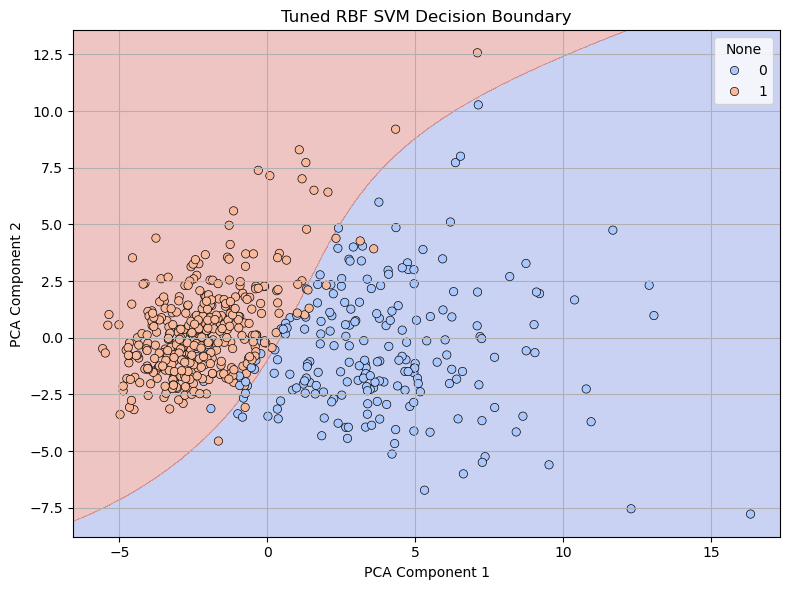

In [3]:
# Plotting function
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(svm_linear, X_pca, y, "Linear SVM Decision Boundary")
plot_decision_boundary(best_rbf_model, X_pca, y, "Tuned RBF SVM Decision Boundary")